# In Vivo Contrast Mechanisms

In addition to the basic contrast mechanisms based on T1, T2 and proton density, in vivo tissues and interactions create additional sources of contrast.  These include T2*, susceptibility, fat versus water, and admisistration of contrast agents.  Additional important sources of contrast in vivo include flow and magnetization transfer, but these are not covered here.

![MRI is a modality with a multiple Contrasts](images/3DMagic.gif)

## Learning Goals

1. Describe how various types of MRI contrast are created
    * Describe the mechanisms that create T2* relaxation
    * Describe how fat/water imaging works
    * Describe how Gd-based contrast agents work
    * Identify various image contrasts
1. Manipulate MRI sequence parameters to improve performance
    * Choose flip angle, TE, TR, and TI for desired contrast

## T2* and Magnetic Susceptibility

Take from gradient and spin echoes notebook

### T2* 

T2* is also a transverse decay time, and includes T2 as well as additional macroscopic dephasing due to local magnetic field inhomogeneities.  This means $ T_2^* \leq T_2$.  The microscopic dephasing (T2) cannot be refocused, but the macroscopic dephasing effects can be refocused by using a spin echo sequence.  The macroscopic dephasing is caused by differences in magnetic susceptibility between materials and tissues.

While often the macroscopic dephasing effects creating T2* are often undesirable and considered artifacts, T2* is also an important source of contrast to reflect differences in magnetic susceptibility:
1. Iron deposition: The presence of iron in a tissue will create shorter T2* due to the strong magnetic susceptibility of iron.
1. Calcifications: The presence of calcium in a tissue will create shorter T2* due to the strong magnetic susceptibility of calcium.
1. Oxygenated vs deoxygenated blood: Deoxygenated blood will have shorter T2* than oxygenated blood due to the magnetic susceptibility of deoxygenated hemoglobin.  This can be used for selectively imaging veins, and is also the basis of blood oxygen level dependent (BOLD) functional MRI.



## TE and T2/T2*

The transverse magnetization decays with $T_2$ (spin-echoes) or $T_2^*$ (gradient-echoes) once it is flipped by an RF pulse away from the z-axis.  Therefore, the $T_2/T_2^*$ contrast can be controlled by choosing the echo time (TE), which is the time between the center of the RF excitation pulse and the center of the data acquisition (when the center of k-space is acquired).  The signal is then proportional to

$$S_{GE} \propto M_0 \exp(-TE/T_2^*)$$

$$S_{SE} \propto M_0 \exp(-TE/T_2)$$

### T2-weighting and T2*-weighting

To create T2 weighting, the TE is chosen to be long enough such that the there are different amounts of transverse magnetization depending on the T2 value.  For example, at TE = 80 ms we can expect to see good contrast between white matter ($T_2 \approx 60$ ms), gray matter ($T_2 \approx 80$ ms), and cerebrospinal fluid ($T_2 \approx 1500$ ms) in the brain (see simulations above).

The TR is chosen to be long relative to T1 values.  This allows the net magnetization to fully recover each repetition, and thereby eliminating any T1-weighting.

In T2/T2* weighting, longer T2/T2* tissues have higher signal than shorter T2/T2* tissues.

The difference between $T_2$ and $T_2^*$ weighting depends on the choice of pulse sequence: $T_2$-weighting comes from spin-echoes while $T_2^*$-weighting comes from gradient-echoes.   These are discussed later.  The same principle applies of choosing a long enough TE, and a long TR.


## Fat/Water Imaging

The major sources of signal in MRI are hydrogen atoms in water molecules and hydrogen atoms in lipids.  In lipids, the protons experience a different chemical shift, meaning they have a different resonance frequence from water protons.  This can be exploited to create images that isolate fat and water signals.

While lipids have a relatively complex set of chemical shifts, in MRI a general "fat" signal is typically modeled as a single peak that has a -3.5 parts per million (ppm) shift from water.  This leads to a resonance frequency shift $\Delta f_{cs}$ of approximately 220 Hz at 1.5 T and 440 Hz at 3 T.

Separate fat and water images are created by so-called "Dixon" methods, which acquire images at multiple echo times and then use the phase differences that result from the different resonance frequencies to separate them.  Ideally, the signal in these images can be represented as

$$S(TE) = S_{water} + S_{fat} exp(-i 2 \pi \Delta f_{cs} TE)$$

Then fat and water images can be created from in-phase TE, $TE_{in-phase} = n / \Delta f_{cs}$ and out-of-phase TE, $TE_{out-of-phase} = (n+ 1/2) / \Delta f_{cs}$, images:

$$ S(TE_{in-phase}) = S_{water} + S_{fat}$$

$$ S(TE_{out-of-phase}) = S_{water} - S_{fat}$$

$$ \hat S_{water} = S(TE_{in-phase}) + S(TE_{out-of-phase})$$

$$ \hat S_{fat} = S(TE_{in-phase}) - S(TE_{out-of-phase})$$

In reality, additional corrections are required to account for off-resonance, $\Delta f_r(\vec r)$, and more advanced methods also use a multi-peak model accounting for the various chemical shifts in fatty tissue.

## Contrast Agents

Contrast agents used in MRI, such as gadolinium chelates and superparamagnetic iron oxides, shorten the relaxation rates wherever they are present.
This is quantified by their relaxivities, $r_1, r_2$, typiclaly in units of [L / (mmol s)]:

$$\frac{1}{\hat{T}_1} = \frac{1}{T_1} + r_1 \cdot [CM]$$
$$\frac{1}{\hat{T}_2} = \frac{1}{T_2} + r_2 \cdot [CM]$$

Where $\hat{T}_1, \hat{T}_2$ are the relaxation time constants with the agent present, and $[CM]$ is the contrast agent concentration, typically in units of [mM = mmol/L].
<!-- 

https://doi.org/10.1097/01.rli.0000184756.66360.d3

% MAGNETVIST R1 = 4.3 l/MMOL/S R2 = 4.4
% resovist (iron) r1 = 7  r2 = 77
% 0.5 mM 
>

## Image Contrast Examples

![Brain contrast from Pauly and Gold](images/contrast_brain_example.png)

![Brain contrast from Vasily Yarnkh](images/contrast_brain_example-all.png)

![Knee contrast](images/contrast_knee_example.png)


## Simple Contrast Phantom

Below is a simple contrast phantom consisting of three circular objects, each with a different $T_1$ and $T_2$.  The k-space data for these phantoms is created using a "jinc" function, which is the Fourier Transform of a circle:

$$\mathcal{F}\{ \mathrm{circ}(r) \} = \mathrm{jinc}(k_r)$$

The signal is simulated for varying sequence parameters (TE, TR) with a 90-degree flip angle in a gradient-echo scheme by using the helper function:

```Octave
signal_gre = MRsignal_spoiled_gradient_echo(flip, TE, TR, M0, T1, T2)
```

### Challenge Yourself!

Based on the images and TE/TR parameters below, can you estimate T1 and T2 relaxation times of the 3 objects?

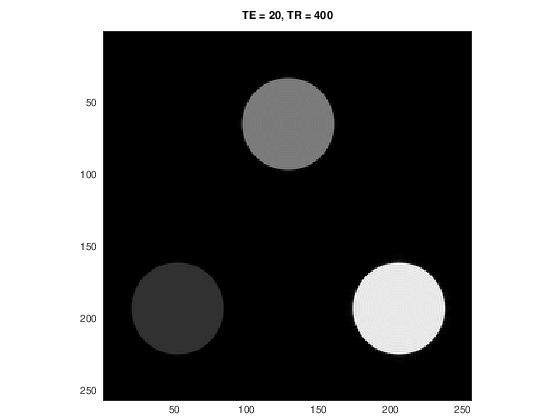

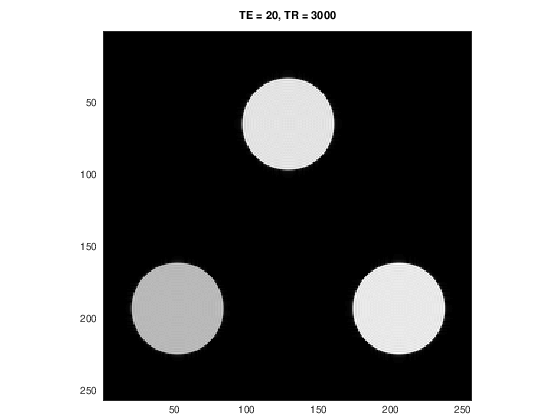

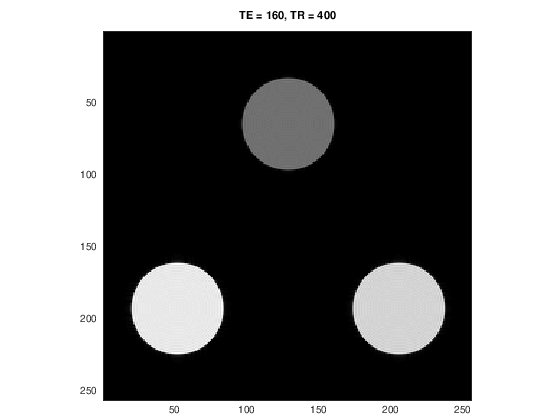

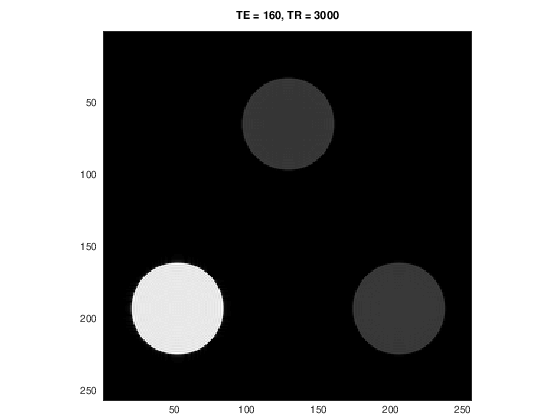

In [15]:
% contrast_phantom


Nphan = 3;
% phantom parameters
xc = [-.3 0 .3]*256;  % x centers
yc = [-.25 .25 -.25]*256;  % y centers
M0 = [1 1 1]; % relative proton densities
T1 = [.3 .8 3]*1e3;  % T1 relaxation times (ms)
T2 = [.06 .06 .2]*1e3;  % T2 relaxation times (ms)
r = 1/64;  % ball radius, where FOV = 1

flip = 90*pi/180;
TEs = [20 160]; TRs = [400 3000];

N = 256;

% matrices with kx, ky coordinates
[kx ky] = meshgrid([-N/2:N/2-1]/N);

for TE = TEs
    for TR = TRs

% initialize k-space data matrix
M = zeros(N,N);

% Generate k-space data by adding together k-space data for each
% individual phantom

for n= 1:Nphan
    % Generates data using Fourier Transform of a circle (jinc) multiplied by complex exponential to shift center location
    M = M+jinc(sqrt(kx.^2 + ky.^2) / (r) ) .* exp(i*2*pi* (kx*xc(n) + ky*yc(n))) * ...
        MRsignal_spoiled_gradient_echo(flip, TE, TR, M0(n), T1(n), T2(n));


end

% reconstruct and display ideal image
m = ifft2c(M);
figure
imagesc(abs(m)), colormap(gray), axis equal tight
title(['TE = ' int2str(TE) ', TR = ' int2str(TR)])

end
end